In [1]:
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive           # read/write to/from SciDrive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplpyplot
%matplotlib inline

In [3]:
import skimage.io                   # image processing library
import urllib                       # accessing resources thorugh remote URLs
import json                         # work with JSON files

In [4]:
from pymongo import MongoClient
from bson.son import SON

In [5]:
import astropy.io.fits as astrofits
from astropy.table import Table

In [6]:
verbose = True
if verbose :
    from IPython.display import display, HTML
    import pprint
    prettyPrinter = pprint.PrettyPrinter(indent=4)

### Retrieve data about FERENGI Galaxies from Zooniverse Mongo Database

In [7]:
clientInstance = MongoClient()
database = clientInstance['test']
gzClassifications = database['galaxy_zoo_classifications']
gzSubjects = database['galaxy_zoo_subjects']
gzGroups = database['galaxy_zoo_groups']

In [8]:
galaxyPropertiesFerengi = gzSubjects.find({"metadata.survey": "ferengi"}, {"metadata.sdss_id" : 1, "metadata.survey": 1})

In [9]:
galaxyPropertiesFerengi.rewind()
galaxyPropertiesFerengiFrame = pd.DataFrame([{ 'sdss_id' : found['metadata']['sdss_id'], 'survey' : found['metadata']['survey'] } for found in galaxyPropertiesFerengi])

In [10]:
galaxyPropertiesFerengiFrameGrouped = galaxyPropertiesFerengiFrame.groupby('sdss_id', as_index=False).first()
if verbose :
    display(galaxyPropertiesFerengiFrameGrouped)

sdss_id   survey
0    587725041707647104  ferengi
1    587725503408111766  ferengi
2    587725816945639430  ferengi
3    587725994110812271  ferengi
4    587726015071584436  ferengi
5    587726031695970407  ferengi
6    587726031726051344  ferengi
7    587726032261742732  ferengi
8    587726033331945615  ferengi
9    587727944033304748  ferengi
10   587728309103427790  ferengi
11   587728669880418319  ferengi
12   587728677395759224  ferengi
13   587728880332308694  ferengi
14   587729158430588988  ferengi
15   587729231446999522  ferengi
16   587729387682660525  ferengi
17   587729773684195496  ferengi
18   587729774758133903  ferengi
19   587729777978769608  ferengi
20   587729778512756840  ferengi
21   587731186742722713  ferengi
22   587731187282477155  ferengi
23   587731499719786522  ferengi
24   587731511532453917  ferengi
25   587731511542415463  ferengi
26   587731512079220798  ferengi
27   587731513685573788  ferengi
28   587731521201766677  ferengi
29   587731680122503257  ferengi
..                  ...      ...
258  588017704539848847  ferengi
259  588017705077178492  ferengi
260  588017705091006505  ferengi
261  588017724402499815  ferengi
262  588017724408922138  ferengi
263  588017726011539655  ferengi
264  588017948290121758  ferengi
265  588017949360259201  ferengi
266  588017977801179176  ferengi
267  588017977819332737  ferengi
268  588017978364198937  ferengi
269  588017978365640858  ferengi
270  588017978367148216  ferengi
271  588017978903429204  ferengi
272  588017979416313862  ferengi
273  588017979437875205  ferengi
274  588017979968847959  ferengi
275  588017979977039995  ferengi
276  588017991222427786  ferengi
277  588017991759495288  ferengi
278  588018055130841095  ferengi
279  588018253755121840  ferengi
280  588023046402998333  ferengi
281  588023669707374818  ferengi
282  588297864190296100  ferengi
283  588297865251520625  ferengi
284  588298661969068037  ferengi
285  588848899357999327  ferengi
286  588848900434559074  ferengi
287  588848900982505544  ferengi

[288 rows x 2 columns]

In [11]:
ferengiIDsString = "(" + ",".join(galaxyPropertiesFerengiFrameGrouped["sdss_id"]) + ")"

In [12]:
if verbose :
    display(ferengiIDsString)

'(587725041707647104,587725503408111766,587725816945639430,587725994110812271,587726015071584436,587726031695970407,587726031726051344,587726032261742732,587726033331945615,587727944033304748,587728309103427790,587728669880418319,587728677395759224,587728880332308694,587729158430588988,587729231446999522,587729387682660525,587729773684195496,587729774758133903,587729777978769608,587729778512756840,587731186742722713,587731187282477155,587731499719786522,587731511532453917,587731511542415463,587731512079220798,587731513685573788,587731521201766677,587731680122503257,587731868555608115,587731868558557253,587731887348514923,587731887348908142,587732048407625763,587732050550915280,587732135918698562,587732153103548455,587732156850438318,587732482197094615,587732482216820783,587732482737832062,587732483813146687,587732483813277735,587732483823894547,587732484357095469,587732582053576732,587732583128236144,587732590103822500,587732591177695368,587732701257138315,587732772132356130,5877330802

### Query CasJobs API to get information about Ferengi Galaxies

In [13]:
ferengiQuery = """SELECT s.objID,
s.ra, s.dec, g.petror90_r,
s.z as redshift, 
s.zErr as redshiftError, 
s.zWarning as redshiftWarning,
s.run,
s.rerun,
s.camcol,
s.field,
s.obj,
s.type 
FROM SpecPhoto AS s
JOIN Galaxy AS g 
ON s.objID = g.objID
WHERE
s.objID IN """ + ferengiIDsString

In [14]:
if verbose :
    prettyPrinter.pprint(ferengiQuery)

('SELECT s.objID,\n'
 's.ra, s.dec, g.petror90_r,\n'
 's.z as redshift, \n'
 's.zErr as redshiftError, \n'
 's.zWarning as redshiftWarning,\n'
 's.run,\n'
 's.rerun,\n'
 's.camcol,\n'
 's.field,\n'
 's.obj,\n'
 's.type \n'
 'FROM SpecPhoto AS s\n'
 'JOIN Galaxy AS g \n'
 'ON s.objID = g.objID\n'
 'WHERE\n'
 's.objID IN '
 '(587725041707647104,587725503408111766,587725816945639430,587725994110812271,587726015071584436,587726031695970407,587726031726051344,587726032261742732,587726033331945615,587727944033304748,587728309103427790,587728669880418319,587728677395759224,587728880332308694,587729158430588988,587729231446999522,587729387682660525,587729773684195496,587729774758133903,587729777978769608,587729778512756840,587731186742722713,587731187282477155,587731499719786522,587731511532453917,587731511542415463,587731512079220798,587731513685573788,587731521201766677,587731680122503257,587731868555608115,587731868558557253,587731887348514923,587731887348908142,587732048407625763,587732050

In [78]:
authToken = '9a75c1a904884db1977f5627a3683406'
import SciServer.LoginPortal
SciServer.LoginPortal.setKeystoneToken(authToken)
userManager = SciServer.LoginPortal.getKeystoneUserWithToken(authToken)

In [16]:
userManager.userName

'hughdickinson'

In [17]:
ferengiResponse = CasJobs.executeQuery(ferengiQuery, "dr7",token=authToken)

In [18]:
if verbose :
    display(ferengiResponse)

objID          ra        dec  petror90_r  redshift  \
0    587725041707647104  191.754220  -1.578090   27.326190  0.009063   
1    587725503408111766  253.015220  63.115797   14.451200  0.010397   
2    587725816945639430  158.345100  64.501628   24.200670  0.010781   
3    587725994110812271  250.277360  46.004065   13.061210  0.017810   
4    587726015071584436  186.056080   2.394698   10.176220  0.026142   
5    587726031695970407  144.147360   1.116620   14.825410  0.016445   
6    587726031726051344  212.792030   1.474723    9.616467  0.025506   
7    587726032261742732  210.190800   2.021989   27.361710  0.012143   
8    587726033331945615  202.067370   2.982641   24.435850  0.021133   
9    587727944033304748  148.544520   2.287193   23.925150  0.024633   
10   587728309103427790  170.998500   2.691881   21.606990  0.022987   
11   587728669880418319  124.082830  43.447637   12.162860  0.024212   
12   587728677395759224  192.275360  64.132142   10.477180  0.007537   
13   587728880332308694  135.916300   3.369799   13.964220  0.012402   
14   587729158430588988  197.123410   4.367957   13.421900  0.024217   
15   587729231446999522  256.693650  35.658312   20.405490  0.023411   
16   587729387682660525  153.797640  56.672086   18.955340  0.026007   
17   587729773684195496  210.899520  -2.131785   15.423450  0.024538   
18   587729774758133903  211.381870  -1.363312   10.862360  0.025052   
19   587729777978769608  209.101030  -1.932376   18.384550  0.024753   
20   587729778512756840  202.517540  -1.717794   20.668630  0.013707   
21   587731186742722713    4.480823   0.335232   18.702510  0.018334   
22   587731187282477155   10.966152   0.801957   22.298350  0.018211   
23   587731499719786522  145.904770  50.276367   13.366900  0.024909   
24   587731511532453917   19.686917  -0.906334   14.399330  0.017559   
25   587731511542415463   42.473356  -1.003639   23.050020  0.023373   
26   587731512079220798   42.420398  -0.523364   21.909370  0.021932   
27   587731513685573788   32.638163   0.738100   15.295180  0.011642   
28   587731521201766677  124.841260  35.047242   13.864750  0.017725   
29   587731680122503257  143.467130  46.863681   20.325270  0.026875   
..                  ...         ...        ...         ...       ...   
258  588017704539848847  177.053330  13.209376   27.525980  0.010502   
259  588017705077178492  178.150730  13.468029   21.529280  0.020969   
260  588017705091006505  210.486420  12.380527    9.417358  0.022770   
261  588017724402499815  189.689300   6.768155   22.891120  0.018674   
262  588017724408922138  204.349590   6.436675   18.632080  0.023891   
263  588017726011539655  186.058030   7.952984   24.695720  0.024146   
264  588017948290121758  219.527390  37.009764   21.158530  0.014669   
265  588017949360259201  209.929760  40.386666   18.115680  0.012667   
266  588017977801179176  136.346190  28.250867   14.886980  0.026713   
267  588017977819332737  185.098540  39.238417   17.988280  0.023020   
268  588017978364198937  208.244990  37.363341    9.656278  0.024122   
269  588017978365640858  212.258340  36.323425   15.345240  0.011121   
270  588017978367148216  216.207220  35.284924   20.659820  0.011189   
271  588017978903429204  214.897080  36.140667   22.022970  0.024793   
272  588017979416313862  146.439100  33.870241   20.595420  0.022439   
273  588017979437875205  208.309310  38.227147   20.609270  0.011706   
274  588017979968847959  191.177470  40.678998   24.157380  0.016760   
275  588017979977039995  214.826660  37.022623   15.363210  0.009710   
276  588017991222427786  194.711960   9.653961   18.851790  0.023926   
277  588017991759495288  195.138540  10.129968   16.567500  0.024143   
278  588018055130841095  255.187860  23.043990   15.639430  0.009149   
279  588018253755121840  233.216450  41.191445   26.507840  0.018930   
280  588023046402998333  136.157040  18.466229   16.766970  0.011147   
281  588023669707374818  181.039490  20.184590   21.139920

In [19]:
if len(ferengiResponse.index) > 0 :
    ferengiResultFrame = ferengiResponse.set_index('objID')
else :
    print ("No results were returned")

In [20]:
if verbose :
    display(ferengiResultFrame)

ra        dec  petror90_r  redshift  \
objID                                                             
587725041707647104  191.754220  -1.578090   27.326190  0.009063   
587725503408111766  253.015220  63.115797   14.451200  0.010397   
587725816945639430  158.345100  64.501628   24.200670  0.010781   
587725994110812271  250.277360  46.004065   13.061210  0.017810   
587726015071584436  186.056080   2.394698   10.176220  0.026142   
587726031695970407  144.147360   1.116620   14.825410  0.016445   
587726031726051344  212.792030   1.474723    9.616467  0.025506   
587726032261742732  210.190800   2.021989   27.361710  0.012143   
587726033331945615  202.067370   2.982641   24.435850  0.021133   
587727944033304748  148.544520   2.287193   23.925150  0.024633   
587728309103427790  170.998500   2.691881   21.606990  0.022987   
587728669880418319  124.082830  43.447637   12.162860  0.024212   
587728677395759224  192.275360  64.132142   10.477180  0.007537   
587728880332308694  135.916300   3.369799   13.964220  0.012402   
587729158430588988  197.123410   4.367957   13.421900  0.024217   
587729231446999522  256.693650  35.658312   20.405490  0.023411   
587729387682660525  153.797640  56.672086   18.955340  0.026007   
587729773684195496  210.899520  -2.131785   15.423450  0.024538   
587729774758133903  211.381870  -1.363312   10.862360  0.025052   
587729777978769608  209.101030  -1.932376   18.384550  0.024753   
587729778512756840  202.517540  -1.717794   20.668630  0.013707   
587731186742722713    4.480823   0.335232   18.702510  0.018334   
587731187282477155   10.966152   0.801957   22.298350  0.018211   
587731499719786522  145.904770  50.276367   13.366900  0.024909   
587731511532453917   19.686917  -0.906334   14.399330  0.017559   
587731511542415463   42.473356  -1.003639   23.050020  0.023373   
587731512079220798   42.420398  -0.523364   21.909370  0.021932   
587731513685573788   32.638163   0.738100   15.295180  0.011642   
587731521201766677  124.841260  35.047242   13.864750  0.017725   
587731680122503257  143.467130  46.863681   20.325270  0.026875   
...                        ...        ...         ...       ...   
588017704539848847  177.053330  13.209376   27.525980  0.010502   
588017705077178492  178.150730  13.468029   21.529280  0.020969   
588017705091006505  210.486420  12.380527    9.417358  0.022770   
588017724402499815  189.689300   6.768155   22.891120  0.018674   
588017724408922138  204.349590   6.436675   18.632080  0.023891   
588017726011539655  186.058030   7.952984   24.695720  0.024146   
588017948290121758  219.527390  37.009764   21.158530  0.014669   
588017949360259201  209.929760  40.386666   18.115680  0.012667   
588017977801179176  136.346190  28.250867   14.886980  0.026713   
588017977819332737  185.098540  39.238417   17.988280  0.023020   
588017978364198937  208.244990  37.363341    9.656278  0.024122   
588017978365640858  212.258340  36.323425   15.345240  0.011121   
588017978367148216  216.207220  35.284924   20.659820  0.011189   
588017978903429204  214.897080  36.140667   22.022970  0.024793   
588017979416313862  146.439100  33.870241   20.595420  0.022439   
588017979437875205  208.309310  38.227147   20.609270  0.011706   
588017979968847959  191.177470  40.678998   24.157380  0.016760   
588017979977039995  214.826660  37.022623   15.363210  0.009710   
588017991222427786  194.711960   9.653961   18.851790  0.023926   
588017991759495288  195.138540  10.129968   16.567500  0.024143   
588018055130841095  255.187860  23.043990   15.639430  0.009149   
588018253755121840  233.216450  41.191445   26.507840  0.018930   
588023046402998333  136.157040  18.466229   16.766970  0.011147   
588023669707374818  181.039490  20.184590   21.139920  0.025435   
588297864190296100  166.767340  45.822124   15.638020  0.025298   
588297865251520625  132.177720  34.230940   10.081610  0.025319   
588298661969068037  204.205670  44.881556   29.719180  0.008974   
58884889

### Just for fun plot a random sampling of the FERENGI galaxy sample

In [21]:
width=500
height=500
pixelsize=0.396 # SDSS pixel scale?

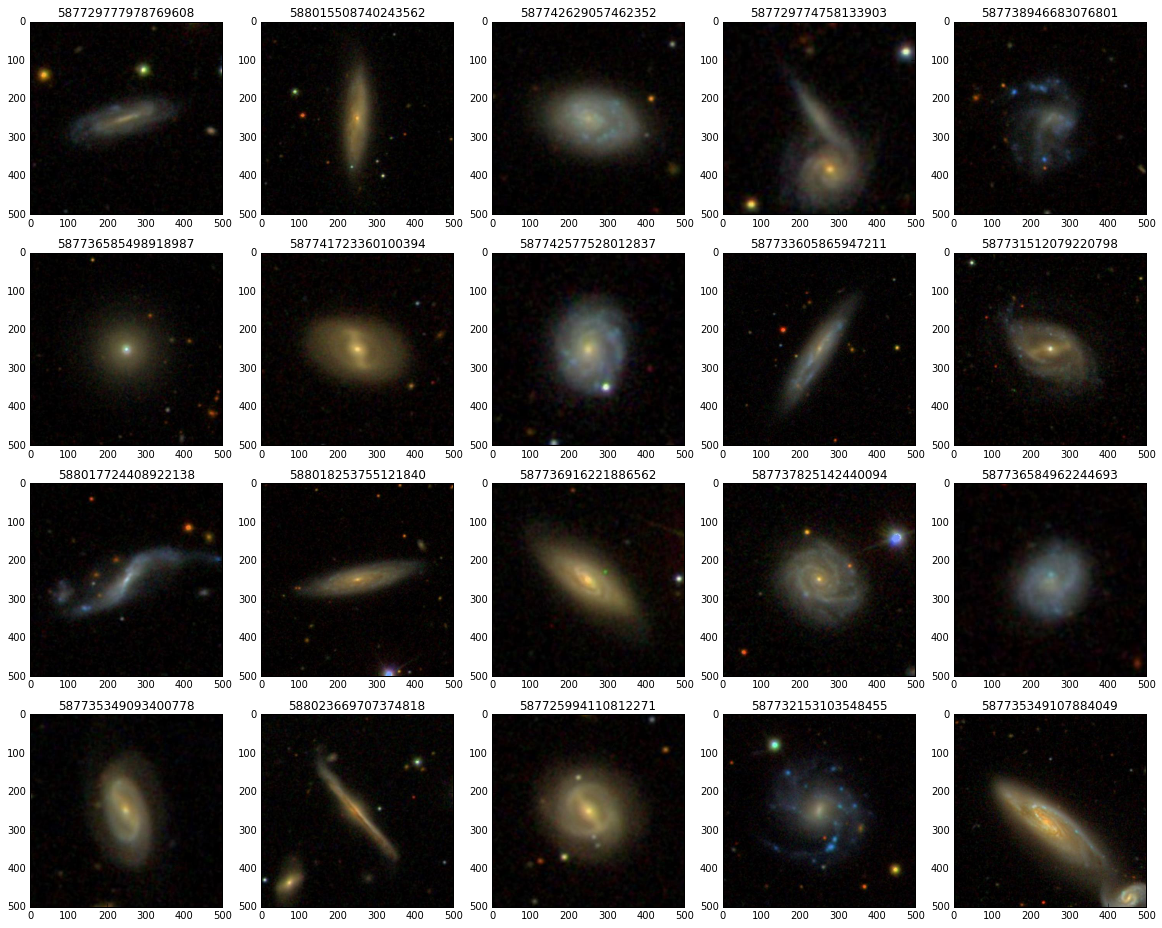

In [22]:
# figures do not persist between cells!
mplpyplot.figure(figsize=(20, 20))
subPlotNum = 1

for index,galData in ferengiResultFrame.sample(20).iterrows():
    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=2.0*galData['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(galData['ra'])
    cutOutImageUrl += "&dec=" + str(galData['dec']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)
    # retrieve 
    cutoutImage=skimage.io.imread(cutOutImageUrl)
    mplpyplot.subplot(5,5,subPlotNum)
    subPlotNum += 1
    mplpyplot.imshow(cutoutImage)
    # show the object identifier (objId) above the image.
    mplpyplot.title(index)

### Now attempt to retireve the corresponding DR12 `ObjId`s for the FERENGI Galaxies based on celestial coordinates

In [23]:
# compose LARGE union query to assemble a stuctire of literal RA and Dec values that can be used as function arguments
ferengiRADecUnion = " UNION ALL ".join(([ "(SELECT " + " , ".join([str(galData['ra'])+ " AS targetRA " , 
                        str(galData['dec']) + " AS targetDec"]) + ")" for index, galData in ferengiResultFrame.iterrows() ]))

if verbose :
    prettyPrinter.pprint(ferengiRADecUnion)

('(SELECT 191.75422 AS targetRA  , -1.5780896 AS targetDec) UNION ALL (SELECT '
 '253.01522 AS targetRA  , 63.115797 AS targetDec) UNION ALL (SELECT 158.3451 '
 'AS targetRA  , 64.501628 AS targetDec) UNION ALL (SELECT 250.27736 AS '
 'targetRA  , 46.004065 AS targetDec) UNION ALL (SELECT 186.05608 AS targetRA  '
 ', 2.394698 AS targetDec) UNION ALL (SELECT 144.14736 AS targetRA  , '
 '1.1166195 AS targetDec) UNION ALL (SELECT 212.79203 AS targetRA  , 1.4747226 '
 'AS targetDec) UNION ALL (SELECT 210.1908 AS targetRA  , 2.0219894 AS '
 'targetDec) UNION ALL (SELECT 202.06737 AS targetRA  , 2.9826406 AS '
 'targetDec) UNION ALL (SELECT 148.54452 AS targetRA  , 2.287193 AS targetDec) '
 'UNION ALL (SELECT 170.9985 AS targetRA  , 2.691881 AS targetDec) UNION ALL '
 '(SELECT 124.08283 AS targetRA  , 43.447637 AS targetDec) UNION ALL (SELECT '
 '192.27536 AS targetRA  , 64.132142 AS targetDec) UNION ALL (SELECT 135.9163 '
 'AS targetRA  , 3.369799 AS targetDec) UNION ALL (SELECT 197.12341 A

In [24]:
ferengiDR12Query = """SELECT ra, 
dec, 
z as redShift,
zErr as redshiftUncertainty,
zWarning as redShiftWarning,
dbo.fSpecZWarningN(zWarning) as redShiftWarningText,
targetRA, 
targetDec, 
(ra - targetRA) AS raOffset, 
(dec - targetDec) AS decOffset, 
dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3) as nearestObjectId 
FROM 
(""" + ferengiRADecUnion + """) AS ferengiRASAndDecs 
JOIN SpecPhoto 
ON objid = dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3)"""

In [25]:
if verbose :
    prettyPrinter.pprint(ferengiDR12Query)

('SELECT ra, \n'
 'dec, \n'
 'z as redShift,\n'
 'zErr as redshiftUncertainty,\n'
 'zWarning as redShiftWarning,\n'
 'dbo.fSpecZWarningN(zWarning) as redShiftWarningText,\n'
 'targetRA, \n'
 'targetDec, \n'
 '(ra - targetRA) AS raOffset, \n'
 '(dec - targetDec) AS decOffset, \n'
 'dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3) as nearestObjectId \n'
 'FROM \n'
 '((SELECT 191.75422 AS targetRA  , -1.5780896 AS targetDec) UNION ALL (SELECT '
 '253.01522 AS targetRA  , 63.115797 AS targetDec) UNION ALL (SELECT 158.3451 '
 'AS targetRA  , 64.501628 AS targetDec) UNION ALL (SELECT 250.27736 AS '
 'targetRA  , 46.004065 AS targetDec) UNION ALL (SELECT 186.05608 AS targetRA  '
 ', 2.394698 AS targetDec) UNION ALL (SELECT 144.14736 AS targetRA  , '
 '1.1166195 AS targetDec) UNION ALL (SELECT 212.79203 AS targetRA  , 1.4747226 '
 'AS targetDec) UNION ALL (SELECT 210.1908 AS targetRA  , 2.0219894 AS '
 'targetDec) UNION ALL (SELECT 202.06737 AS targetRA  , 2.9826406 AS '
 'targetDec) UNI

In [26]:
ferengiDR12Response = CasJobs.executeQuery(ferengiDR12Query, "dr12",token=authToken)

In [31]:
if verbose :
    display(ferengiDR12Response)

ra        dec  redShift  redshiftUncertainty  redShiftWarning  \
0    145.800190   0.414172  0.025250             0.000015                0   
1    171.077680   0.643726  0.026364             0.000010                0   
2     14.925516   0.916609  0.017636             0.000017                0   
3    208.048140  13.999919  0.024441             0.000015                0   
4      4.480823   0.335232  0.018083             0.000013                0   
5     32.638163   0.738100  0.011655             0.000009                0   
6    206.102180  20.409565  0.026982             0.000014                0   
7     17.659383  -0.278045  0.018026             0.000009                0   
8    209.731110  15.635770  0.025468             0.000007                0   
9     19.686917  -0.906334  0.017517             0.000011                0   
10   225.516810  42.183822  0.016493             0.000013                0   
11   202.067370   2.982641  0.021049             0.000013                0   
12    46.373172  -0.381803  0.024882             0.000006                0   
13   214.826660  37.022623  0.009470             0.000016                0   
14   201.725950  11.561621  0.022932             0.000008                0   
15   114.473680  47.957198  0.020971             0.000012                0   
16   139.370820  -0.620573  0.016575             0.000008                0   
17   208.309310  38.227147  0.011696             0.000008                0   
18   148.544520   2.287193  0.024563             0.000016                0   
19   210.190800   2.021989  0.011990             0.000011                0   
20   212.792030   1.474723  0.025479             0.000010                0   
21   135.916300   3.369799  0.012394             0.000006                0   
22   143.467130  46.863681  0.026851             0.000010                0   
23   173.167690  52.950379  0.026459             0.000018                0   
24   127.194810  40.665886  0.024463             0.000011                0   
25   202.517540  -1.717794  0.013730             0.000006                0   
26   153.797640  56.672086  0.026007             0.000015                0   
27   139.165800   7.266377  0.018755             0.000013                0   
28   153.928540  43.992521  0.017342             0.000012                0   
29   174.910170   4.465542  0.019183             0.000017                0   
..          ...        ...       ...                  ...              ...   
251  194.772070  27.644432  0.018126             0.000009                0   
252  194.733180  27.833393  0.025103             0.000009                0   
253  135.818770  18.261079  0.011551             0.000007                0   
254  138.761580  19.697103  0.026164             0.000012                0   
255  163.410560  26.909875  0.021100             0.000012                0   
256  148.246000  19.632068  0.024438             0.000008                0   
257  134.100390  13.182282  0.013781             0.000021                0   
258  137.343930  15.613664  0.012201             0.000007                0   
259  169.161580  15.727319  0.012620             0.000007                0   
260  169.914210  24.929548  0.025927             0.000009                0   
261  171.438960  24.139993  0.023736             0.000010                0   
262  176.221080  19.456621  0.018817             0.000011                0   
263  175.844750  16.485396  0.021794             0.000013                0   
264  247.259080  11.679912  0.026355             0.000020                0   
265  145.979020  14.802369  0.026275             0.000019                0   
266  152.081940  16.898120  0.026443             0.000013                0   
267  182.990640  20.027866  0.008002             0.000012                0   
268  191.377570  20.815954  0.008652             0.000011                0   
269  203.180710  18.176318  0.022696             0.000010                0   
270  185.440120  25.884658  0.02303

In [32]:
if len(ferengiDR12Response.index) > 0 :
    ferengiDR12ResultFrame = ferengiDR12Response.set_index('nearestObjectId')
else :
    print ("No results were returned")

In [33]:
if verbose :
    display(ferengiDR12ResultFrame)

ra        dec  redShift  redshiftUncertainty  \
nearestObjectId                                                             
1237648721752621257  145.800190   0.414172  0.025250             0.000015   
1237648722300567644  171.077680   0.643726  0.026364             0.000010   
1237663785277653149   14.925516   0.916609  0.017636             0.000017   
1237662530063499615  208.048140  13.999919  0.024441             0.000015   
1237657191444054059    4.480823   0.335232  0.018083             0.000013   
1237657071698313314   32.638163   0.738100  0.011655             0.000009   
1237667781769625658  206.102180  20.409565  0.026982             0.000014   
1237663783668220085   17.659383  -0.278045  0.018026             0.000009   
1237668349207445599  209.731110  15.635770  0.025468             0.000007   
1237666338116599846   19.686917  -0.906334  0.017517             0.000011   
1237661211510702111  225.516810  42.183822  0.016493             0.000013   
1237651754556850306  202.067370   2.982641  0.021049             0.000013   
1237663783680802912   46.373172  -0.381803  0.024882             0.000006   
1237662226225234033  214.826660  37.022623  0.009470             0.000016   
1237671958588096535  201.725950  11.561621  0.022932             0.000008   
1237663917874217441  114.473680  47.957198  0.020971             0.000012   
1237648720676061404  139.370820  -0.620573  0.016575             0.000008   
1237662225686069253  208.309310  38.227147  0.011696             0.000008   
1237653665258209458  148.544520   2.287193  0.024563             0.000016   
1237651753486647426  210.190800   2.021989  0.011990             0.000011   
1237651752950956047  212.792030   1.474723  0.025479             0.000010   
1237654601557213384  135.916300   3.369799  0.012394             0.000006   
1237657590311616620  143.467130  46.863681  0.026851             0.000010   
1237657630599872600  173.167690  52.950379  0.026459             0.000018   
1237657608573419635  127.194810  40.665886  0.024463             0.000011   
1237655499737661519  202.517540  -1.717794  0.013730             0.000006   
1237655108907565214  153.797640  56.672086  0.026007             0.000015   
1237660412650455281  139.165800   7.266377  0.018755             0.000013   
1237661358608613531  153.928540  43.992521  0.017342             0.000012   
1237654604795347172  174.910170   4.465542  0.019183             0.000017   
...                         ...        ...       ...                  ...   
1237667323797635307  194.772070  27.644432  0.018126             0.000009   
1237667444048592948  194.733180  27.833393  0.025103             0.000009   
1237667429554716846  135.818770  18.261079  0.011551             0.000007   
1237667430092963901  138.761580  19.697103  0.026164             0.000012   
1237667431713931412  163.410560  26.909875  0.021100             0.000012   
1237667536932765788  148.246000  19.632068  0.024438             0.000008   
1237670596015751434  134.100390  13.182282  0.013781             0.000021   
1237667782814859386  137.343930  15.613664  0.012201             0.000007   
1237668494168359060  169.161580  15.727319  0.012620             0.000007   
1237667551420940416  169.914210  24.929548  0.025927             0.000009   
1237667911124713496  171.438960  24.139993  0.023736             0.000010   
1237668293375885374  176.221080  19.456621  0.018817             0.000011   
1237668494708048014  175.844750  16.485396  0.021794             0.000013   
1237668367464792653  247.259080  11.679912  0.026355             0.000020   
1237671125376106683  145.979020  14.802369  0.026275             0.000019   
1237668289082294360  152.081940  16.898120  0.026443             0.000013   
1237668298203267092  182.990640  20.027866  0.008002             0.000012   
1237668299280416899  191.377570  20.815954  0.008652             0.000011   
1237668270825078838  203.180710  18.176318  0.022696             0.000010   
1237667912740896940  185.

### Plot the reshift distribution of the matched objects

Minimum redshift in original FERENGI sample is 0.003665871
Number of galaxies in original FERENGI sample is 281


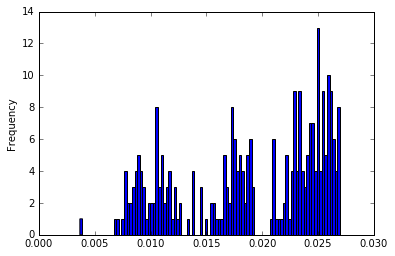

In [34]:
ferengiDR12ResultFrame["redShift"].plot.hist(bins=100)
print("Minimum redshift in original FERENGI sample is {0}".format(min(ferengiDR12ResultFrame['redShift'][ferengiDR12ResultFrame['redShiftWarning'] == 0])))
print("Number of galaxies in original FERENGI sample is {0}".format(len(ferengiDR12ResultFrame.index)))

### Find any mismatching coordinates

In [35]:
mismatchingCoordRows = ferengiDR12ResultFrame[(ferengiDR12ResultFrame['raOffset'] != 0) | (ferengiDR12ResultFrame['decOffset'] != 0) ]
if(len(mismatchingCoordRows.index) > 0) :
    display(mismatchingCoordRows)
else :
    print ('No mismatches found!')

No mismatches found!


### Find Galaxies with 0.001 < z < 0.013 in the original FERENGI dataset

In [36]:
redShiftMaximum = 0.013
redShiftMinimum = 0.001
zSelectedferengiDR12ResultFrame = ferengiDR12ResultFrame.where((ferengiDR12ResultFrame["redShift"] > redShiftMinimum) & (ferengiDR12ResultFrame["redShift"] < redShiftMaximum)).dropna()
if verbose :
    display(zSelectedferengiDR12ResultFrame)

ra        dec  redShift  redshiftUncertainty  \
nearestObjectId                                                             
1237657071698313314   32.638163   0.738100  0.011655             0.000009   
1237662226225234033  214.826660  37.022623  0.009470             0.000016   
1237662225686069253  208.309310  38.227147  0.011696             0.000008   
1237651753486647426  210.190800   2.021989  0.011990             0.000011   
1237654601557213384  135.916300   3.369799  0.012394             0.000006   
1237661852003991657  177.551920  45.478677  0.010605             0.000010   
1237662306187149376  208.243250  39.718684  0.008808             0.000006   
1237658205582000162  173.234780  50.241849  0.009780             0.000008   
1237658205048799246  186.401570  50.336965  0.008256             0.000016   
1237657589780512816  162.271000  52.335507  0.007889             0.000004   
1237659133284974654  225.202830  48.360784  0.008481             0.000005   
1237665129062203408  136.455430  25.445192  0.009045             0.000008   
1237662666965319774  251.860600  21.125683  0.008626             0.000005   
1237662661595693140  213.561550  35.423657  0.010624             0.000015   
1237662224615342237  216.207220  35.284924  0.011167             0.000025   
1237661070318305541  141.239190  11.541526  0.012096             0.000012   
1237664292073635910  179.650690  16.175024  0.012140             0.000010   
1237662684145909963  216.113610  32.951906  0.006864             0.000047   
1237664819286376466  179.792450  37.793405  0.010753             0.000007   
1237665097924411608  137.393350  25.223059  0.007758             0.000009   
1237667323254931478  179.620920  27.528784  0.011476             0.000005   
1237667429572870349  179.961710  26.813136  0.011797             0.000012   
1237667255089627171  185.148010  30.796865  0.003666             0.000006   
1237667430628982959  136.664760  19.336535  0.010991             0.000014   
1237667735577493555  172.296240  22.294819  0.010829             0.000026   
1237671262281269409  153.619060  15.902928  0.010164             0.000010   
1237668350282367039  212.601990  16.112521  0.007684             0.000011   
1237658312402600088  177.629030  60.128697  0.011287             0.000015   
1237671265496006791  191.754220  -1.578090  0.009045             0.000044   
1237671939266642003  253.015220  63.115797  0.010372             0.000007   
...                         ...        ...       ...                  ...   
1237660615050264622  176.551460  10.595534  0.010235             0.000009   
1237658203441725500  198.526990  48.156170  0.008426             0.000008   
1237661210434863178  219.306570  43.695946  0.011026             0.000017   
1237661851475640329  204.763150  43.566278  0.009143             0.000008   
1237661433240551463  204.205670  44.881556  0.008798             0.000009   
1237661871336980601  207.188190  41.709794  0.008899             0.000009   
1237662306723823671  207.855730  40.213272  0.008235             0.000010   
1237662195608453157  209.929760  40.386666  0.012695             0.000006   
1237662305114193923  210.105420  38.520738  0.008735             0.000006   
1237661086958354567  128.486070  26.972662  0.011750             0.000009   
1237661950788042874  177.053330  13.209376  0.010505             0.000005   
1237662224613834886  212.258340  36.323425  0.011087             0.000009   
1237662301379035170  255.187860  23.043990  0.009116             0.000014   
1237661950271815836  225.057070   9.937757  0.010483             0.000015   
1237661069251510395  157.444950  13.018173  0.009792             0.000013   
1237664289388036300  176.748740  13.873430  0.010534             0.000023   
1237661068723027987  177.183330  14.052907  0.010632             0.000016   
1237662685219651703  216.388440  33.848120  0.011092             0.000018   
1237664853646704889  222.112760  31.791574  0.009556             0.000010   
1237665226766352421  178.

### Find Galaxies with 0.001 < z < 0.013 in the SDSS DR12 dataset

In [37]:
galaxyTypeInt = 3  # could look up from table in principle
sdssDR12Query = """SELECT s.objID,
s.ra, 
s.dec,
s.type,
s.z as redShift,
s.zErr as redshiftUncertainty,
s.zWarning as redShiftWarning,
dbo.fSpecZWarningN(zWarning) as redShiftWarningText,
g.petror90_r
FROM SpecPhoto AS s
JOIN Galaxy AS g 
ON s.objID = g.objID
WHERE (s.type = """ + str(galaxyTypeInt) + " AND s.z < " + str(redShiftMaximum) + " AND s.z > " + str(redShiftMinimum) + " AND s.zWarning = 0)"

In [38]:
sdssDR12Response = CasJobs.executeQuery(sdssDR12Query, "dr12",token=authToken)

In [39]:
if verbose :
    display(sdssDR12Response)   

objID          ra        dec  type  redShift  \
0     1237648673971437623  189.522280  -0.027016     3  0.012513   
1     1237648673994637807  242.433180  -0.115123     3  0.005019   
2     1237648675068903947  243.637300   0.821636     3  0.006618   
3     1237648702969348436  190.011990  -1.050770     3  0.005298   
4     1237648702975180927  203.229690  -1.159490     3  0.012687   
5     1237648702977343535  208.226920  -1.114630     3  0.004586   
6     1237648702979375194  212.907460  -1.156163     3  0.005095   
7     1237648702984683605  225.005450  -1.091117     3  0.006298   
8     1237648703507660888  193.221640  -0.822594     3  0.004755   
9     1237648703508119858  194.279430  -0.807631     3  0.009410   
10    1237648703519326351  219.958320  -0.718165     3  0.005897   
11    1237648703519326352  219.958460  -0.706363     3  0.005982   
12    1237648703519326353  219.957040  -0.718464     3  0.005929   
13    1237648703525945748  235.077070  -0.812514     3  0.012523   
14    1237648704044794112  193.912040  -0.264903     3  0.003709   
15    1237648704046563336  197.859790  -0.249731     3  0.012773   
16    1237648704048529754  202.355120  -0.399044     3  0.010793   
17    1237648704049053815  203.648120  -0.353245     3  0.012634   
18    1237648704049512499  204.608660  -0.227621     3  0.012392   
19    1237648704054296626  215.599000  -0.387703     3  0.005516   
20    1237648704055673107  218.725830  -0.342652     3  0.006004   
21    1237648704056197681  219.919450  -0.302543     3  0.006050   
22    1237648704056262741  220.044780  -0.293985     3  0.006550   
23    1237648704056328322  220.234820  -0.318170     3  0.005755   
24    1237648704056524892  220.691370  -0.351079     3  0.005678   
25    1237648704056918077  221.546370  -0.222966     3  0.005535   
26    1237648704059605287  227.696820  -0.348333     3  0.007202   
27    1237648704062423712  234.064500  -0.349405     3  0.010001   
28    1237648704576946202  183.061370   0.072312     3  0.007831   
29    1237648704578846903  187.495200   0.027218     3  0.008046   
...                   ...         ...        ...   ...       ...   
6071  1237678877781066788  316.524570   9.252729     3  0.012613   
6072  1237678877782835764  320.509440   9.886256     3  0.009986   
6073  1237678920198783025  346.236050  12.322885     3  0.007785   
6074  1237679004483387453  345.029290   3.954717     3  0.001202   
6075  1237679167161303218   29.861252  14.834245     3  0.006986   
6076  1237679167161761856   30.935845  14.709317     3  0.012167   
6077  1237679167161761909   30.957469  14.739165     3  0.012093   
6078  1237679254672900615   37.660118  -3.821055     3  0.005544   
6079  1237679321787727992   35.398741  -5.507164     3  0.007435   
6080  1237679322861731975   35.962862  -4.614737     3  0.007660   
6081  1237679437739524213   32.244491  -7.766781     3  0.012863   
6082  1237679437739524390   32.264080  -7.847277     3  0.012529   
6083  1237679437739524498   32.158377  -7.903895     3  0.012773   
6084  1237679437739524581   32.270800  -7.793633     3  0.012572   
6085  1237679437739655177   32.455460  -7.782397     3  0.012582   
6086  1237679437743063158   40.334254  -7.284982     3  0.005566   
6087  1237679437743063185   40.372441  -7.346090     3  0.004310   
6088  1237679454921949328  352.442370  15.877488     3  0.009089   
6089  1237679460289872226   21.951612  19.066881     3  0.002651   
6090  1237679460291379557   25.508096  18.758772     3  0.002042   
6091  1237679478015787569   21.319337  22.015652     3  0.004603   
6092  1237680073399534431   32.140184  23.670612     3  0.002881   
6093  1237680090574684306  335.197220  14.234640     3  0.011993   
6094  1237680099167437003   32.594117   1.200866     3  0.011862   
6095  1237680099168092200   34.121918   1.255893     3  0.009345   
6096  1237680240909090979  349.769920  -8.485093     3  0.007385   
6097  1237680241435738283  326.164390  -6.689654     3  0.010308   
6098  12

In [40]:
if len(sdssDR12Response.index) > 0 :
    sdssDR12ResultFrame = sdssDR12Response.set_index('objID')
else :
    print ("No results were returned")

In [41]:
if verbose :
    display(sdssDR12ResultFrame)

ra        dec  type  redShift  \
objID                                                        
1237648673971437623  189.522280  -0.027016     3  0.012513   
1237648673994637807  242.433180  -0.115123     3  0.005019   
1237648675068903947  243.637300   0.821636     3  0.006618   
1237648702969348436  190.011990  -1.050770     3  0.005298   
1237648702975180927  203.229690  -1.159490     3  0.012687   
1237648702977343535  208.226920  -1.114630     3  0.004586   
1237648702979375194  212.907460  -1.156163     3  0.005095   
1237648702984683605  225.005450  -1.091117     3  0.006298   
1237648703507660888  193.221640  -0.822594     3  0.004755   
1237648703508119858  194.279430  -0.807631     3  0.009410   
1237648703519326351  219.958320  -0.718165     3  0.005897   
1237648703519326352  219.958460  -0.706363     3  0.005982   
1237648703519326353  219.957040  -0.718464     3  0.005929   
1237648703525945748  235.077070  -0.812514     3  0.012523   
1237648704044794112  193.912040  -0.264903     3  0.003709   
1237648704046563336  197.859790  -0.249731     3  0.012773   
1237648704048529754  202.355120  -0.399044     3  0.010793   
1237648704049053815  203.648120  -0.353245     3  0.012634   
1237648704049512499  204.608660  -0.227621     3  0.012392   
1237648704054296626  215.599000  -0.387703     3  0.005516   
1237648704055673107  218.725830  -0.342652     3  0.006004   
1237648704056197681  219.919450  -0.302543     3  0.006050   
1237648704056262741  220.044780  -0.293985     3  0.006550   
1237648704056328322  220.234820  -0.318170     3  0.005755   
1237648704056524892  220.691370  -0.351079     3  0.005678   
1237648704056918077  221.546370  -0.222966     3  0.005535   
1237648704059605287  227.696820  -0.348333     3  0.007202   
1237648704062423712  234.064500  -0.349405     3  0.010001   
1237648704576946202  183.061370   0.072312     3  0.007831   
1237648704578846903  187.495200   0.027218     3  0.008046   
...                         ...        ...   ...       ...   
1237678877781066788  316.524570   9.252729     3  0.012613   
1237678877782835764  320.509440   9.886256     3  0.009986   
1237678920198783025  346.236050  12.322885     3  0.007785   
1237679004483387453  345.029290   3.954717     3  0.001202   
1237679167161303218   29.861252  14.834245     3  0.006986   
1237679167161761856   30.935845  14.709317     3  0.012167   
1237679167161761909   30.957469  14.739165     3  0.012093   
1237679254672900615   37.660118  -3.821055     3  0.005544   
1237679321787727992   35.398741  -5.507164     3  0.007435   
1237679322861731975   35.962862  -4.614737     3  0.007660   
1237679437739524213   32.244491  -7.766781     3  0.012863   
1237679437739524390   32.264080  -7.847277     3  0.012529   
1237679437739524498   32.158377  -7.903895     3  0.012773   
1237679437739524581   32.270800  -7.793633     3  0.012572   
1237679437739655177   32.455460  -7.782397     3  0.012582   
1237679437743063158   40.334254  -7.284982     3  0.005566   
1237679437743063185   40.372441  -7.346090     3  0.004310   
1237679454921949328  352.442370  15.877488     3  0.009089   
1237679460289872226   21.951612  19.066881     3  0.002651   
1237679460291379557   25.508096  18.758772     3  0.002042   
1237679478015787569   21.319337  22.015652     3  0.004603   
1237680073399534431   32.140184  23.670612     3  0.002881   
1237680090574684306  335.197220  14.234640     3  0.011993   
1237680099167437003   32.594117   1.200866     3  0.011862   
1237680099168092200   34.121918   1.255893     3  0.009345   
1237680240909090979  349.769920  -8.485093     3  0.007385   
1237680241435738283  326.164390  -6.689654     3  0.010308   
1237680247886381195  355.659180  20.859028     3  0.007367   
1237680298888593433  352.116150  22.421248     3  0.011690   
1237680332163646118  326.188760  23.898510     3  0.003826   

                     redshiftUncertainty  redShiftWarning redShiftWarningText  \
objID                                    

### Plot the redshift distribution of the selected sample

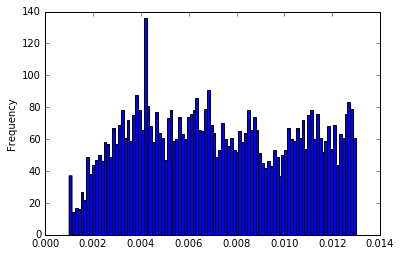

In [42]:
sdssDR12ResultFrame['redShift'][sdssDR12ResultFrame['redShiftWarning'] == 0].plot.hist(bins=100)

### Plot another random selection of images from the sample

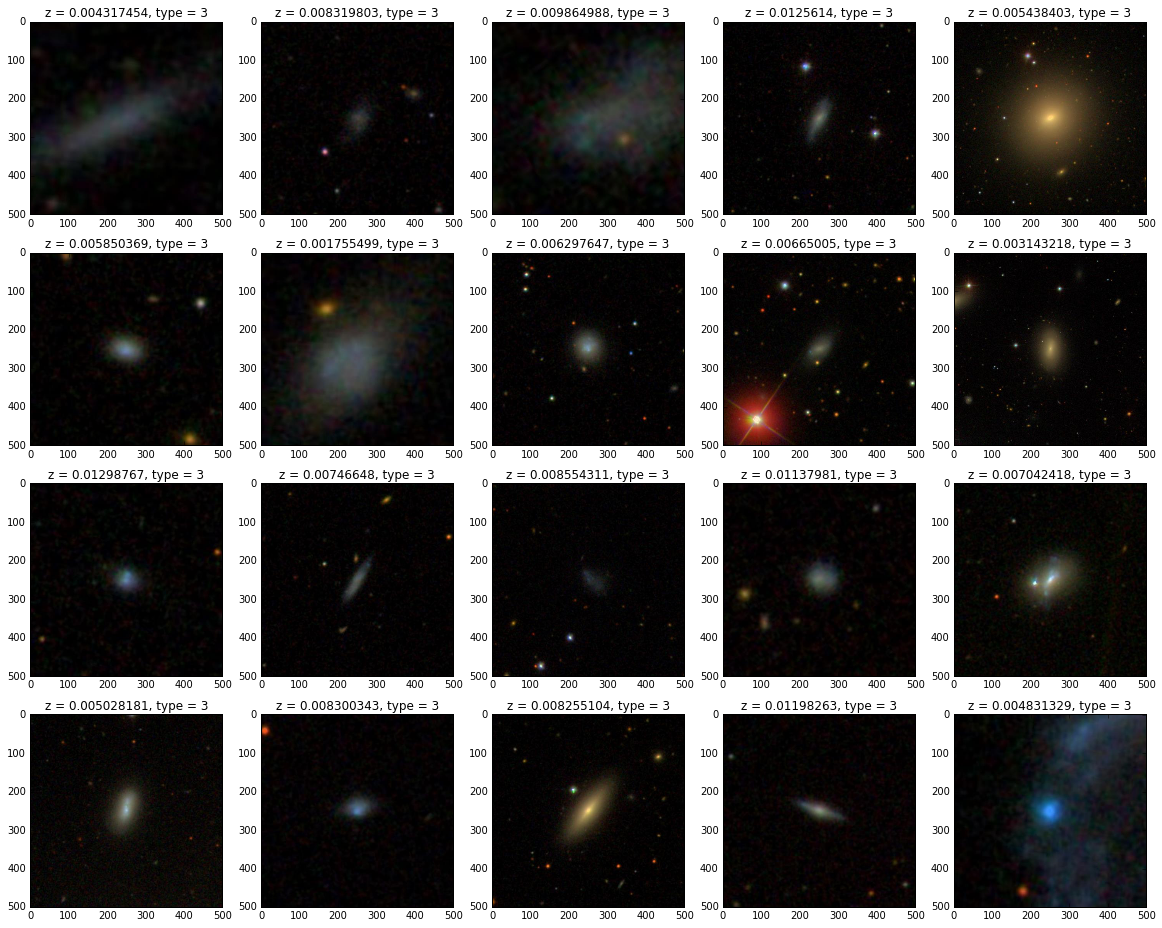

In [43]:
# figures do not persist between cells!
mplpyplot.figure(figsize=(20, 20))
subPlotNum = 1

for index,galData in sdssDR12ResultFrame.sample(20).iterrows():
    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=4.0*galData['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(galData['ra'])
    cutOutImageUrl += "&dec=" + str(galData['dec']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)
    # retrieve 
    cutoutImage=skimage.io.imread(cutOutImageUrl)
    mplpyplot.subplot(5,5,subPlotNum)
    subPlotNum += 1
    mplpyplot.imshow(cutoutImage)
    # show the object identifier (objId) above the image.
    mplpyplot.title("z = " + str(galData['redShift']) + ", type = " + str(galData['type']))

### Filter out any galaxies that were in the original FERENGI sample

In [44]:
originalFerengiSampleMatches = zSelectedferengiDR12ResultFrame.merge(sdssDR12ResultFrame, how='left', left_index=True, right_index=True, suffixes = ('_ferengi', '_sdss'))

In [45]:
if verbose :
    display(originalFerengiSampleMatches)

ra_ferengi  dec_ferengi  redShift_ferengi  \
1237651538170544242  158.345100    64.501628          0.010812   
1237651753486647426  210.190800     2.021989          0.011990   
1237654398620663929  192.275360    64.132142          0.007560   
1237654601557213384  135.916300     3.369799          0.012394   
1237657071698313314   32.638163     0.738100          0.011655   
1237657589780512816  162.271000    52.335507          0.007889   
1237657589783461929  173.084790    53.904568          0.009406   
1237657857143603254  168.112140    51.636797          0.009448   
1237657874328453165  139.139330    39.872792          0.008893   
1237658203441725500  198.526990    48.156170          0.008426   
1237658205048799246  186.401570    50.336965          0.008256   
1237658205582000162  173.234780    50.241849          0.009780   
1237658303278481422  158.368560    57.052611          0.008830   
1237658304353140825  161.364020    58.593170          0.010180   
1237658311328727169  177.142260    59.242396          0.010926   
1237658312402600088  177.629030    60.128697          0.011287   
1237659131671478415  215.404790    50.390310          0.007702   
1237659133284974654  225.202830    48.360784          0.008481   
1237659327090851918  214.129600    57.810122          0.010436   
1237660343387816025  119.293520    23.779805          0.007822   
1237660615050264622  176.551460    10.595534          0.010235   
1237661068723027987  177.183330    14.052907          0.010632   
1237661069251510395  157.444950    13.018173          0.009792   
1237661070318305541  141.239190    11.541526          0.012096   
1237661086958354567  128.486070    26.972662          0.011750   
1237661210434863178  219.306570    43.695946          0.011026   
1237661433240551463  204.205670    44.881556          0.008798   
1237661851475640329  204.763150    43.566278          0.009143   
1237661852003991657  177.551920    45.478677          0.010605   
1237661871336980601  207.188190    41.709794          0.008899   
...                         ...          ...               ...   
1237662306723823671  207.855730    40.213272          0.008235   
1237662661595693140  213.561550    35.423657          0.010624   
1237662666965319774  251.860600    21.125683          0.008626   
1237662684145909963  216.113610    32.951906          0.006864   
1237662685219651703  216.388440    33.848120          0.011092   
1237664289388036300  176.748740    13.873430          0.010534   
1237664292073635910  179.650690    16.175024          0.012140   
1237664819286376466  179.792450    37.793405          0.010753   
1237664853646704889  222.112760    31.791574          0.009556   
1237665023827116140  173.375660    33.507730          0.008642   
1237665097924411608  137.393350    25.223059          0.007758   
1237665129062203408  136.455430    25.445192          0.009045   
1237665226766352421  178.927600    32.188894          0.011451   
1237665373868982313  237.319320    21.831365          0.006970   
1237667254019424409  194.458090    29.654193          0.008420   
1237667255089627171  185.148010    30.796865          0.003666   
1237667323254931478  179.620920    27.528784          0.011476   
1237667429554716846  135.818770    18.261079          0.011551   
1237667429572870349  179.961710    26.813136          0.011797   
1237667430628982959  136.664760    19.336535          0.010991   
1237667735577493555  172.296240    22.294819          0.010829   
1237667782814859386  137.343930    15.613664          0.012201   
1237668298203267092  182.990640    20.027866          0.008002   
1237668299280416899  191.377570    20.815954          0.008652   
1237668310016262333  233.915300    12.606396          0.010589   
1237668350282367039  212.601990    16.112521          0.007684   
1237668494168359060  169.161580    15.727319          0.012620   
1237671262281269409  153.619060    15.902928          0.010164   
1237671265496006791  191.754220    -1.578090          0.00904

### Display all rows in the original redshift-selected FERENGI sample that have no counterpart in the DR12 sample

In [46]:
numMissingMatches = len(zSelectedferengiDR12ResultFrame) - len(originalFerengiSampleMatches.dropna().index)
if len(originalFerengiSampleMatches.dropna().index) < len(zSelectedferengiDR12ResultFrame) :
    print ('{0} objects from the original Ferengi Sample are missing'.format(numMissingMatches))
    display(originalFerengiSampleMatches[originalFerengiSampleMatches['ra_sdss'].isnull()])
else :
    print ('The DR12 selection fully contains the original FERENGI data sample!')

1 objects from the original Ferengi Sample are missing


ra_ferengi  dec_ferengi  redShift_ferengi  \
1237662306723823671   207.85573    40.213272          0.008235   

                     redshiftUncertainty_ferengi  redShiftWarning_ferengi  \
1237662306723823671                      0.00001                     16.0   

                    redShiftWarningText_ferengi   targetRA  targetDec  \
1237662306723823671              MANY_OUTLIERS   207.85573  40.213272   

                     raOffset  decOffset  ra_sdss  dec_sdss  type  \
1237662306723823671       0.0        0.0      NaN       NaN   NaN   

                     redShift_sdss  redshiftUncertainty_sdss  \
1237662306723823671            NaN                       NaN   

                     redShiftWarning_sdss redShiftWarningText_sdss  petror90_r  
1237662306723823671                   NaN                      NaN         NaN

**Note that this row has a non-zero redshift warning in DR12 and was therefore intentionally and correctly excluded.**

### Filter rows from the DR12 sample that correspond to the original FERENGI dataset

In [47]:
filteredSdssDR12ResultFrame = sdssDR12ResultFrame[~sdssDR12ResultFrame.index.isin(ferengiDR12ResultFrame.index)]

In [48]:
if verbose :
    display(filteredSdssDR12ResultFrame)

ra        dec  type  redShift  \
objID                                                        
1237648673971437623  189.522280  -0.027016     3  0.012513   
1237648673994637807  242.433180  -0.115123     3  0.005019   
1237648675068903947  243.637300   0.821636     3  0.006618   
1237648702969348436  190.011990  -1.050770     3  0.005298   
1237648702975180927  203.229690  -1.159490     3  0.012687   
1237648702977343535  208.226920  -1.114630     3  0.004586   
1237648702979375194  212.907460  -1.156163     3  0.005095   
1237648702984683605  225.005450  -1.091117     3  0.006298   
1237648703507660888  193.221640  -0.822594     3  0.004755   
1237648703508119858  194.279430  -0.807631     3  0.009410   
1237648703519326351  219.958320  -0.718165     3  0.005897   
1237648703519326352  219.958460  -0.706363     3  0.005982   
1237648703519326353  219.957040  -0.718464     3  0.005929   
1237648703525945748  235.077070  -0.812514     3  0.012523   
1237648704044794112  193.912040  -0.264903     3  0.003709   
1237648704046563336  197.859790  -0.249731     3  0.012773   
1237648704048529754  202.355120  -0.399044     3  0.010793   
1237648704049053815  203.648120  -0.353245     3  0.012634   
1237648704049512499  204.608660  -0.227621     3  0.012392   
1237648704054296626  215.599000  -0.387703     3  0.005516   
1237648704055673107  218.725830  -0.342652     3  0.006004   
1237648704056197681  219.919450  -0.302543     3  0.006050   
1237648704056262741  220.044780  -0.293985     3  0.006550   
1237648704056328322  220.234820  -0.318170     3  0.005755   
1237648704056524892  220.691370  -0.351079     3  0.005678   
1237648704056918077  221.546370  -0.222966     3  0.005535   
1237648704059605287  227.696820  -0.348333     3  0.007202   
1237648704062423712  234.064500  -0.349405     3  0.010001   
1237648704576946202  183.061370   0.072312     3  0.007831   
1237648704578846903  187.495200   0.027218     3  0.008046   
...                         ...        ...   ...       ...   
1237678877781066788  316.524570   9.252729     3  0.012613   
1237678877782835764  320.509440   9.886256     3  0.009986   
1237678920198783025  346.236050  12.322885     3  0.007785   
1237679004483387453  345.029290   3.954717     3  0.001202   
1237679167161303218   29.861252  14.834245     3  0.006986   
1237679167161761856   30.935845  14.709317     3  0.012167   
1237679167161761909   30.957469  14.739165     3  0.012093   
1237679254672900615   37.660118  -3.821055     3  0.005544   
1237679321787727992   35.398741  -5.507164     3  0.007435   
1237679322861731975   35.962862  -4.614737     3  0.007660   
1237679437739524213   32.244491  -7.766781     3  0.012863   
1237679437739524390   32.264080  -7.847277     3  0.012529   
1237679437739524498   32.158377  -7.903895     3  0.012773   
1237679437739524581   32.270800  -7.793633     3  0.012572   
1237679437739655177   32.455460  -7.782397     3  0.012582   
1237679437743063158   40.334254  -7.284982     3  0.005566   
1237679437743063185   40.372441  -7.346090     3  0.004310   
1237679454921949328  352.442370  15.877488     3  0.009089   
1237679460289872226   21.951612  19.066881     3  0.002651   
1237679460291379557   25.508096  18.758772     3  0.002042   
1237679478015787569   21.319337  22.015652     3  0.004603   
1237680073399534431   32.140184  23.670612     3  0.002881   
1237680090574684306  335.197220  14.234640     3  0.011993   
1237680099167437003   32.594117   1.200866     3  0.011862   
1237680099168092200   34.121918   1.255893     3  0.009345   
1237680240909090979  349.769920  -8.485093     3  0.007385   
1237680241435738283  326.164390  -6.689654     3  0.010308   
1237680247886381195  355.659180  20.859028     3  0.007367   
1237680298888593433  352.116150  22.421248     3  0.011690   
1237680332163646118  326.188760  23.898510     3  0.003826   

                     redshiftUncertainty  redShiftWarning redShiftWarningText  \
objID                                    

### We found 6032 potential galaxies! Now determine which were classified as part of Galaxy Zoo.

Preliminarily retrieve the full list of objects that have Galaxy Zoo classifcations, select the IDs, coordinates and classification counts from the `zooSpec` and `zooNoSpec` tables.

In [75]:
galzooSpecQuery = 'SELECT objid, dr7objid, ra, dec, nvote from zooSpec'
galzooNoSpecQuery = 'SELECT objid, dr7objid, ra, dec, nvote from zooNoSpec'
galzooSpecResultFrame = CasJobs.executeQuery(galzooSpecQuery, "dr12",token=authToken)
galzooNoSpecResultFrame = CasJobs.executeQuery(galzooNoSpecQuery, "dr12",token=authToken)
galzooAllResultFrame = galzooSpecResultFrame.append(galzooNoSpecResultFrame)
if verbose :
    display(galzooAllResultFrame)

objid            dr7objid        ra       dec  nvote
0       1237650795146576030  587725073921671348  146.8598 -0.808917     34
1       1237651800159027582  588848899361341651  146.9639 -0.545028     41
2       1237651800158896649  588848899361210557  146.7280 -0.556861     42
3       1237650795146510627  587725073921605817  146.7441 -0.652222     29
4       1237650795146444862  587725073921540169  146.5927 -0.760250     23
5       1237650795146576091  587725073921671400  146.9341 -0.670417     42
6       1237651800159027384  588848899361341553  146.9500 -0.592222     56
7       1237650795146445031  587725073921540326  146.6286 -0.765139     53
8       1237650795146575935  587725073921671251  146.8577 -0.662889     27
9       1237650795146641532  587725073921736854  146.9635 -0.759333     56
10      1237650795683512690  587725074458608003  147.0378 -0.266583     29
11      1237648721216274697  588848899898212618  147.0234 -0.160111     36
12      1237648721216274666  588848899898212583  146.9108 -0.074583     25
13      1237650795683512507  587725074458607824  146.9561 -0.342306     62
14      1237650795683446969  587725074458542267  146.9201 -0.306472     50
15      1237650796220514489  587725074995609782  147.3295  0.028889     25
16      1237648721216405657  588848899898343596  147.2480 -0.035722     30
17      1237648720679469274  588848899361407244  147.1868 -0.493806     62
18      1237648721216340148  588848899898278080  147.1146 -0.165222     28
19      1237648720142336237  588848898824274160  146.5713 -0.957194     36
20      1237648720142336185  588848898824274111  146.5128 -0.845778     37
21      1237650795146379400  587725073921474722  146.3603 -0.816694     52
22      1237650795146314028  587725073921409297  146.3118 -0.813222     24
23      1237650795146379447  587725073921474764  146.4483 -0.713445     17
24      1237650795683447045  587725074458542338  146.9023 -0.313667     29
25      1237648720679338241  588848899361276123  146.8643 -0.464056     33
26      1237650795683381521  587725074458476823  146.7885 -0.310722     27
27      1237650795683381563  587725074458476862  146.7771 -0.242028     33
28      1237648720679338261  588848899361276143  146.8916 -0.512667     61
29      1237650795683446947  587725074458542251  146.9012 -0.413167     25
...                     ...                 ...       ...       ...    ...
225238  1237648722848710855  588848901530648770  196.7740  1.205111     51
225239  1237648722848710856  588848901530648771  196.7738  1.200944     25
225240  1237648722848776772  588848901530714378  196.9713  1.201083     31
225241  1237648722848841878  588848901530779777  197.0767  1.214167     24
225242  1237648722849497263  588848901531435146  198.5501  1.128139     35
225243  1237648722849563154  588848901531500747  198.7694  1.096583     31
225244  1237648722849628340  588848901531566239  198.8512  1.160056     39
225245  1237648722849694059  588848901531631921  199.0170  1.123500     32
225246  1237651752408318313  588848901531893952  199.6311  1.183528     50
225247  1237651752408383674  588848901531959492  199.8726  1.199417     36
225248  1237648722850349385  588848901532287180  200.5051  1.143694     67
225249                    0  588848901532483597  200.9523  1.114111     28
225250  1237651505952915526  588848901532483623  200.9531  1.099778     26
225251  1237651505952915750  588848901532483740  200.9833  1.091944     48
225252  1237651505953243213  588848901532811270  201.6919  1.171250     33
225253                    0  588848901533073493  202.4352  1.084306     28
225254  1237651505953636786  588848901533139189  202.4882  1.154472     39
225255  1237651505953702200  588848901533204787  202.7292  1.146556     26
225256  1237651505953898649  588848901533401287  203.1277  1.151500     30
225257  1237671991878549558  588848901534580779  205.8548  1.091944     53
225258  1237671958056140981  588848901534646523  206.0013  1.125500     61
225259  1237671992952488355  588848901535039869

Attempt a straightforward merge based on `ra` and `dec` columns.

In [76]:
filteredSdssDR12ResultFrame.merge(galzooAllResultFrame, left_on=['ra','dec'], right_on=['ra','dec'])

ra       dec  type  redShift  redshiftUncertainty  redShiftWarning  \
0   174.4351  54.04575     3  0.002898             0.000040                0   
1   172.8182  57.06633     3  0.005561             0.000004                0   
2   183.1347  12.12381     3  0.007372             0.000014                0   
3   204.8998  43.05278     3  0.011788             0.000009                0   
4   182.6016  13.17061     3  0.004153            -1.000000                0   
5   177.3470  39.77128     3  0.002835             0.000005                0   
6   197.0899  39.46117     3  0.010951             0.000017                0   
7   216.0677  36.25880     3  0.011854             0.000011                0   
8   229.6338  31.16119     3  0.005526             0.000027                0   
9   142.8642  32.06114     3  0.008103             0.000020                0   
10  208.3927  37.52225     3  0.007819             0.000011                0   
11  159.0733  36.42533     3  0.002067             0.000006                0   
12  173.0100  36.69800     3  0.008330             0.000017                0   
13  158.3385  23.65170     3  0.004380             0.000022                0   
14  154.8690  21.19017     3  0.004633             0.000010                0   
15  148.2798  16.67769     3  0.004670             0.000007                0   

   redShiftWarningText  petror90_r                objid            dr7objid  \
0                   OK   12.221280  1237657589783789709  587731868558885025   
1                   OK    6.804174  1237661353241280606  587735696440885344   
2                   OK   54.476460  1237661812274036810  588017566025842748   
3                   OK    9.572763  1237661850938834974  588017604690640935   
4                   OK   10.718950  1237661950790402284  588017704542208176   
5                   OK   46.273570  1237662225138647177  588017978890453144   
6                   OK   16.993140  1237662225145331826  588017978897137784   
7                   OK   13.231570  1237662225688887671  588017979440693604   
8                   OK   15.556090  1237662663212401161  587736941987561802   
9                   OK    8.088165  1237664093441753257  588017978877870224   
10                  OK   21.046700  1237664294761529597  587738573536624841   
11                  OK   13.223240  1237664667899723842  587738946674819185   
12                  OK   30.196450  1237664818747146309  587739097522241538   
13                  OK    9.481730  1237667539084640434  587741817859735772   
14                  OK   13.374760  1237667536935584091  587741815710679391   
15                  OK   63.253870  1237668289617592430  587742568392687703   

    nvote  
0      34  
1      65  
2      29  
3      33  
4      48  
5      28  
6      33  
7      34  
8      50  
9      35  
10     30  
11     36  
12     69  
13     39  
14     52  
15     62

Now retrieve a more selective sample consisting only of Galaxy-Zoo-classified galaxies, identified by positional matching in ra and dec.

In [107]:
createQuery = """CREATE table RADecPairs (
    int_id int identity(1,1), 
    ra float, 
    dec float, 
)"""
createQueryResult = CasJobs.executeQuery(createQuery, context="MyDB", token=authToken)
display(createQueryResult)

Rows Affected
0              0

Records must be inserted into the temporary table in blocks of 1000.

In [108]:
numInserted = 0
while numInserted < len(filteredSdssDR12ResultFrame.index) :
    allRADecValuesString = ",".join(([ "(" + " , ".join([str(galData['ra']) , 
                        str(galData['dec'])]) + ")" for index, galData in filteredSdssDR12ResultFrame[numInserted:numInserted+1000].iterrows() ]))
    
    insertQuery = """INSERT INTO mydb.RADecPairs (ra, dec) VALUES """ + allRADecValuesString
    insertQueryId = CasJobs.submitJob(insertQuery, token=authToken)
    insertQueryStatus = CasJobs.waitForJob(insertQueryId)
    if verbose :
        prettyPrinter.pprint(insertQueryStatus)
    numInserted += 1000

Waiting...Waiting...Waiting...Waiting...Done!
{   'AutoComplete': 0,
    'Created_Table': '',
    'Estimate': 500,
    'HostIP': 'SQL001DBHost   ',
    'JobID': 18919446,
    'Message': 'Query Complete',
    'ModifiedQuery': 'INSERT INTO [sdss3q].mydb_1951176903.webuser.RADecPairs '
                     '(ra, dec) VALUES (189.52228 , -0.027016383),(242.43318 , '
                     '-0.11512294),(243.6373 , 0.82163553),(190.01199 , '
                     '-1.0507696),(203.22969 , -1.1594902),(208.22692 , '
                     '-1.11463),(212.90746 , -1.1561632),(225.00545 , '
                     '-1.091117),(193.22164 , -0.82259414),(194.27943 , '
                     '-0.8076305),(219.95832 , -0.71816513),(219.95846 , '
                     '-0.70636323),(219.95704 , -0.71846387),(235.07707 , '
                     '-0.81251353),(193.91204 , -0.26490299),(197.85979 , '
                     '-0.24973076),(202.35512 , -0.39904381),(203.64812 , 

In [80]:
dr12NearbyZooNoSpecQuery = """SELECT objid,
dr7objid,
ra, 
dec, 
nvote,
targetRA, 
targetDec, 
(ra - targetRA) AS raOffset, 
(dec - targetDec) AS decOffset, 
dbo.fDistanceArcMinEq(targetRA, targetDec, ra, dec) as nearbyObjectOffset 
FROM 
(""" + zooRADecUnion + """) AS ferengiRASAndDecs 
JOIN zooNoSpec 
ON dbo.fDistanceArcMinEq(targetRA, targetDec, ra, dec) < 2 into mydb.dr12NearbyZooNoSpecJobTable"""

In [81]:
dr12NearbyZooNoSpecJobId = CasJobs.submitJob(dr12NearbyZooNoSpecQuery, context="dr12",token=authToken)
dr12NearbyZooNoSpecJobStatus = CasJobs.waitForJob(dr12NearbyZooNoSpecJobId)
if verbose :
    prettyPrinter.pprint(dr12NearbyZooNoSpecJobStatus)

Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Waiting...Done!
{   'AutoComplete': 0,
    'Created_Table': 'dr12NearbyZooNoSpecJobTable',
    'Estimate': 500,
    'HostIP': 'DR12_Long      ',
    'JobID': 18918172,
    'Message': 'Column, parameter, or variable #6: Cannot spec

In [82]:
testresult= CasJobs.executeQuery("select * from dr12NearbyZooNoSpecJobTable", token="authToken")

In [83]:
testresult

{'Error': {'ErrorCode': 401,
  'Message': '{"Error Code":401,"Error Type":"Unauthorized","Error Message":"Authentication failed: Response status code does not indicate success: 500 (Internal Server Error).","LogMessageID":"6cd94eec-1570-4ca0-b9b7-07a9293837d6"}'}}